### Imports

Import dependencies and make a couple helper functions

In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import sys

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]

from wand import * #import the module here, so that it can be reloaded.

def drawImage(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

### Detection Masks

Introspect and edit detection masks and thresholds

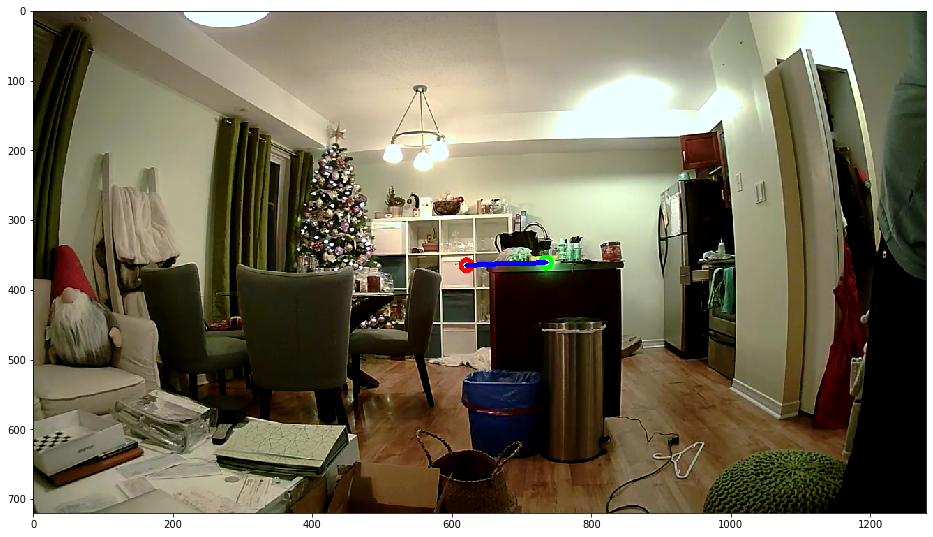

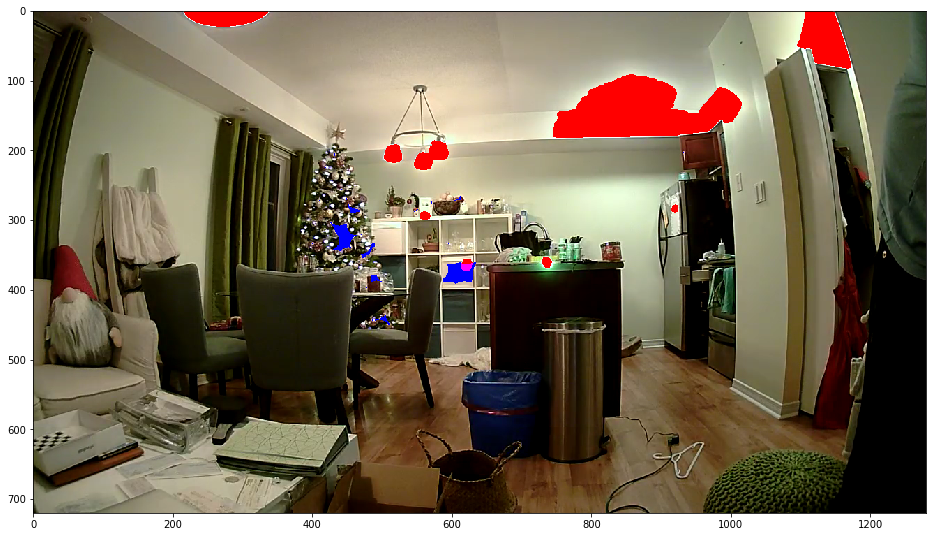

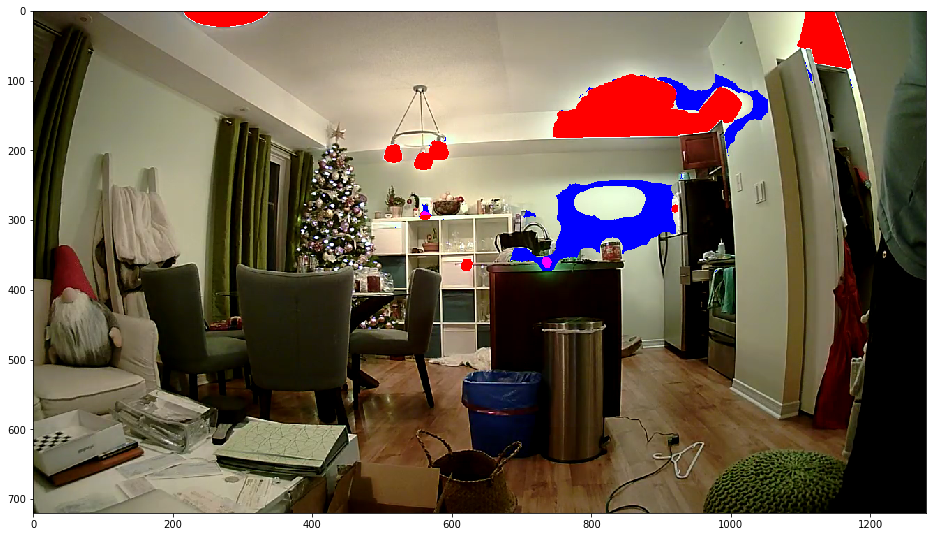

In [76]:
img = cv2.imread('../sample_data/wand_test_2.png')
wand = BallWand()
outTop = wand.topMarker.visualize_mask(img,img)
outBottom = wand.bottomMarker.visualize_mask(img,img)
keypoints = wand.detect(img)
outWand = wand.draw(img,keypoints)

drawImage(outWand)
drawImage(outTop)
drawImage(outBottom)

### Verify

Test the final detector

In [77]:
from tqdm.notebook import tqdm

videoInPath = '../sample_data/wand_test_3.mp4'
videoOutPath = '../sample_data/wand_test_1.avi'

inputCapture = cv2.VideoCapture(videoInPath)
nFrames = int(inputCapture.get(cv2.CAP_PROP_FRAME_COUNT))
fps = inputCapture.get(cv2.CAP_PROP_FPS)
frameWidth = int(inputCapture.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(inputCapture.get(cv2.CAP_PROP_FRAME_HEIGHT))
outputCaputre = cv2.VideoWriter(videoOutPath, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), fps,(frameWidth, frameHeight))

wand = BallWand()

for i in tqdm(range(nFrames)):
    frameCaptured, frame = inputCapture.read()
    if frameCaptured:
        wand.topMarker.visualize_mask(frame)
        outputCaputre.write(frame)
    else:
        if i == 0:
            raise RuntimeError("Couldn't find input video")
inputCapture.release()
outputCapture.release()

RuntimeError: this method is broken, call on topMarker or bottomMarker instead

In [5]:
from tqdm.notebook import tqdm

videoInPath = '../sample_data/wand_test_3.mp4'
videoOutPath = '../sample_data/wand_test.avi'

inputCapture = cv2.VideoCapture(videoInPath)
nFrames = int(inputCapture.get(cv2.CAP_PROP_FRAME_COUNT))
fps = inputCapture.get(cv2.CAP_PROP_FPS)
frameWidth = int(inputCapture.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(inputCapture.get(cv2.CAP_PROP_FRAME_HEIGHT))
outputCapture = cv2.VideoWriter(videoOutPath, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), fps,(frameWidth, frameHeight))

wand = BallWand()

for i in tqdm(range(nFrames)):
    frameCaptured, frame = inputCapture.read()
    if frameCaptured:
        keypoints = wand.detect(frame)
        if keypoints is not None:
            out = wand.draw(frame,keypoints)
        else:
            out = frame.copy()
        outputCapture.write(out)
    else:
        if i == 0:
            raise RuntimeError("Couldn't find input video")
inputCapture.release()
outputCapture.release()